In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
plt.rcParams['figure.figsize'] = (20, 10) # set default size of plots

In [10]:
df = pd.read_csv('processed routes.csv', index_col=0)

In [12]:
df.route_id.unique()

array([ 2482,  2484, 17905, 17906, 23821, 23822], dtype=int64)

In [16]:
df

,route_id,planned_start_time,predicted_end_time,timestamp,file,start_hour,time_delta,route_short_name,direction
0,2482,2019-04-01 05:40:00.000,2019-04-01 06:17:00.000,2019-04-01 06:22:14.454,siri_rt_data.2019-04-01.0.csv.gz,05:40:00,5.233333,49,פתח תקווה -> תל אביב יפו
1,2482,2019-04-01 05:55:00.000,2019-04-01 06:32:00.000,2019-04-01 06:32:17.402,siri_rt_data.2019-04-01.0.csv.gz,05:55:00,0.283333,49,פתח תקווה -> תל אביב יפו
2,2482,2019-04-01 06:10:00.000,2019-04-01 06:49:00.000,2019-04-01 06:52:21.133,siri_rt_data.2019-04-01.0.csv.gz,06:10:00,3.350000,49,פתח תקווה -> תל אביב יפו
3,2482,2019-04-01 06:20:00.000,2019-04-01 06:59:00.000,2019-04-01 07:05:25.100,siri_rt_data.2019-04-01.0.csv.gz,06:20:00,6.416667,49,פתח תקווה -> תל אביב יפו
4,2482,2019-04-01 06:30:00.000,2019-04-01 07:13:00.000,2019-04-01 07:15:25.733,siri_rt_data.2019-04-01.0.csv.gz,06:30:00,2.416667,49,פתח תקווה -> תל אביב יפו
...,...,...,...,...,...,...,...,...,...
2770,23822,2019-04-10 21:40:00.000,2019-04-10 22:32:00.000,2019-04-10 22:38:41.592,siri_rt_data.2019-04-10.12.csv.gz,21:40:00,6.683333,20,תל אביב יפו -> פתח תקווה
2771,23822,2019-04-10 22:00:00.000,2019-04-10 22:52:00.000,2019-04-10 22:58:41.540,siri_rt_data.2019-04-10.12.csv.gz,22:00:00,6.683333,20,תל אביב יפו -> פתח תקווה
2772,23822,2019-04-10 22:20:00.000,2019-04-10 23:09:00.000,2019-04-10 23:12:41.486,siri_rt_data.2019-04-10.12.csv.gz,22:20:00,3.683333,20,תל אביב יפו -> פתח תקווה
2773,23822,2019-04-10 22:40:00.000,2019-04-10 23:24:00.000,2019-04-10 23:28:41.448,siri_rt_data.2019-04-10.12.csv.gz,22:40:00,4.683333,20,תל אביב יפו -> פתח תקווה


In [19]:
df.groupby('route_id')['route_short_name', 'direction'].agg({'route_short_name': max, 'direction': max})

,route_short_name,direction
route_id,,
2482,49,פתח תקווה -> תל אביב יפו
2484,49,תל אביב יפו -> פתח תקווה
17905,64,פתח תקווה -> תל אביב יפו
17906,64,תל אביב יפו -> פתח תקווה
23821,20,פתח תקווה -> תל אביב יפו
23822,20,תל אביב יפו -> פתח תקווה


In [27]:
import datetime

In [49]:
def plot_route(route_id):
    df[df.route_id==route_id].groupby('start_hour').time_delta.mean().plot()

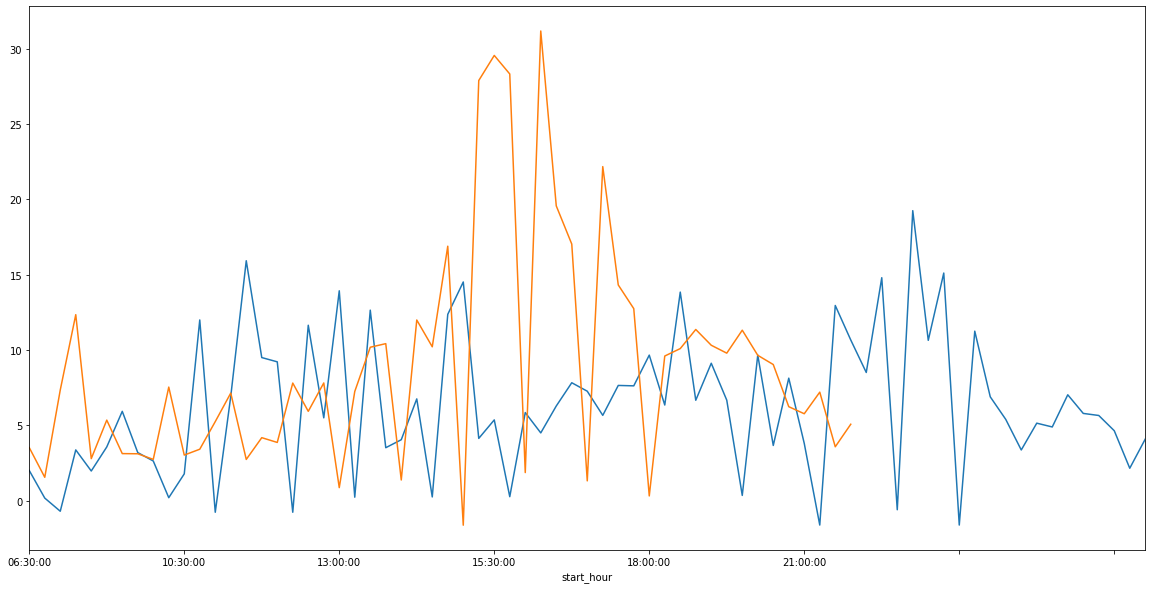

In [56]:
plot_route(2482)
# route 20 to Tel Aviv
plot_route(2484)
# route 20 to Petha Tikva

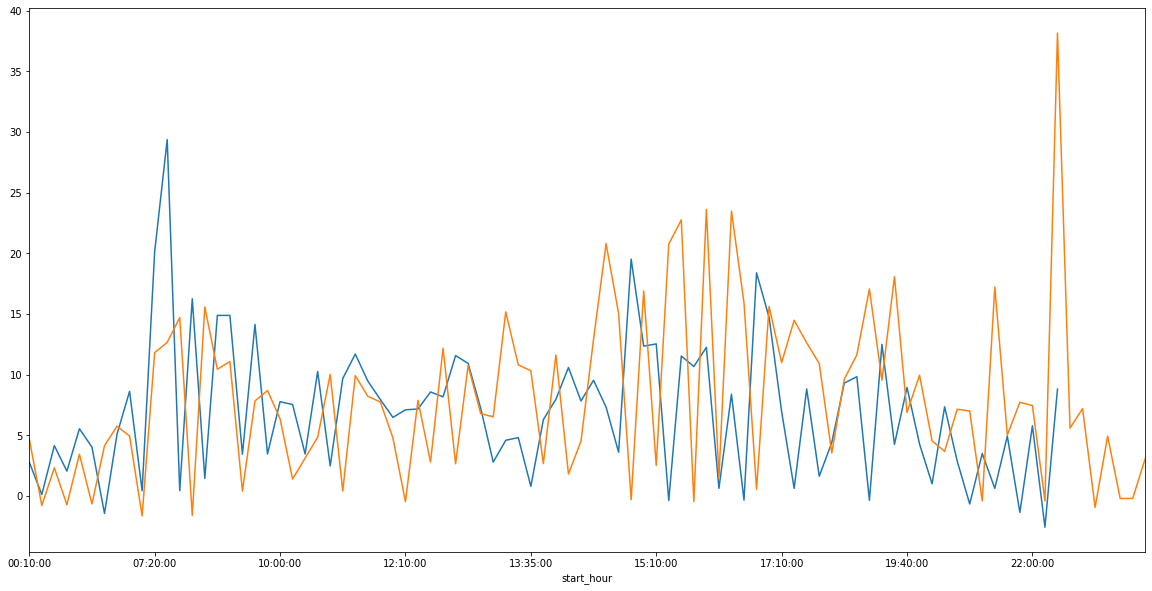

In [57]:
plot_route(23821)
# route 49 to Tel Aviv
plot_route(23822)
# route 49 to Petah Tikva

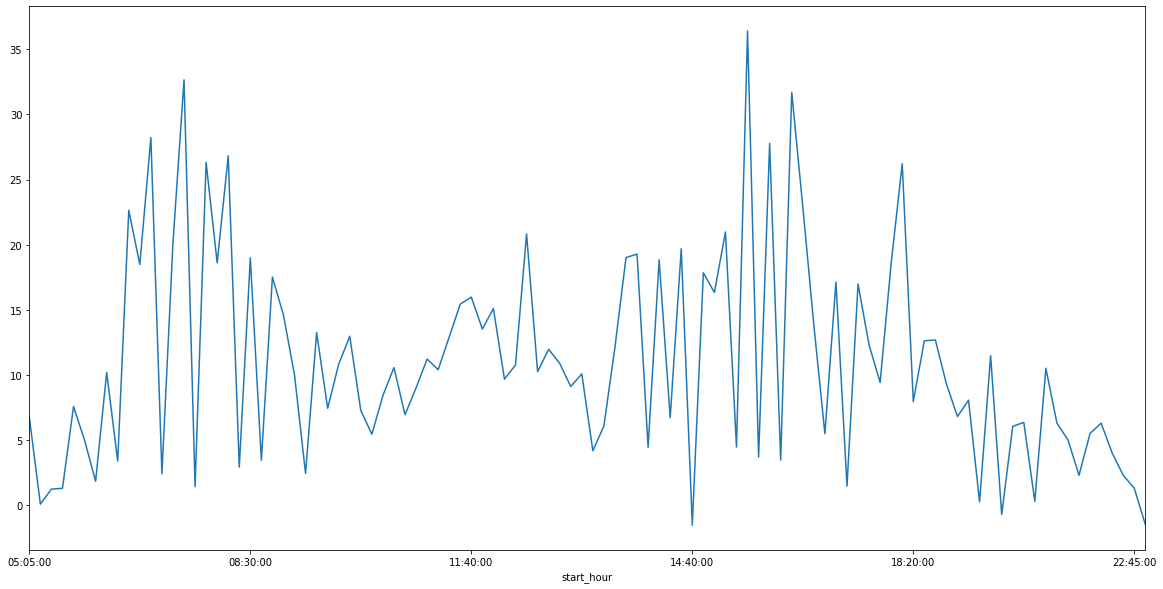

In [51]:
plot_route(17905)

In [65]:
df[(df.route_id==23821) & ((df.start_hour=='09:00:00') | (df.start_hour=='09:20:00'))]

,route_id,planned_start_time,predicted_end_time,timestamp,file,start_hour,time_delta,route_short_name,direction
1912,23821,2019-04-01 09:00:00.000,2019-04-01 10:19:00.000,2019-04-01 10:23:37.066,siri_rt_data.2019-04-01.3.csv.gz,09:00:00,4.616667,20,פתח תקווה -> תל אביב יפו
1913,23821,2019-04-01 09:20:00.000,2019-04-01 10:30:00.000,2019-04-01 10:38:37.268,siri_rt_data.2019-04-01.3.csv.gz,09:20:00,8.616667,20,פתח תקווה -> תל אביב יפו
1965,23821,2019-04-02 09:00:00.000,2019-04-02 10:15:00.000,2019-04-02 10:41:35.447,siri_rt_data.2019-04-02.3.csv.gz,09:00:00,26.583333,20,פתח תקווה -> תל אביב יפו
1966,23821,2019-04-02 09:20:00.000,2019-04-02 10:34:00.000,2019-04-02 10:46:36.431,siri_rt_data.2019-04-02.4.csv.gz,09:20:00,12.600000,20,פתח תקווה -> תל אביב יפו
2016,23821,2019-04-03 09:00:00.000,2019-04-03 10:09:00.000,2019-04-03 10:25:36.007,siri_rt_data.2019-04-03.3.csv.gz,09:00:00,16.600000,20,פתח תקווה -> תל אביב יפו
2017,23821,2019-04-03 09:20:00.000,2019-04-03 10:31:00.000,2019-04-03 10:36:35.995,siri_rt_data.2019-04-03.3.csv.gz,09:20:00,5.583333,20,פתח תקווה -> תל אביב יפו
2069,23821,2019-04-04 09:00:00.000,2019-04-04 10:07:00.000,2019-04-04 10:21:42.728,siri_rt_data.2019-04-04.2.csv.gz,09:00:00,14.700000,20,פתח תקווה -> תל אביב יפו
2070,23821,2019-04-04 09:20:00.000,2019-04-04 10:26:00.000,2019-04-04 10:28:42.723,siri_rt_data.2019-04-04.2.csv.gz,09:20:00,2.700000,20,פתח תקווה -> תל אביב יפו
2120,23821,2019-04-05 09:00:00.000,2019-04-05 09:57:00.000,2019-04-05 10:09:38.993,siri_rt_data.2019-04-05.2.csv.gz,09:00:00,12.633333,20,פתח תקווה -> תל אביב יפו
2121,23821,2019-04-05 09:20:00.000,2019-04-05 10:21:00.000,2019-04-05 10:31:40.176,siri_rt_data.2019-04-05.2.csv.gz,09:20:00,10.666667,20,פתח תקווה -> תל אביב יפו
